In [37]:
from astropy.io import ascii
import matplotlib.pyplot as plt
from __future__ import division
import numpy as np
import scipy as scipy
from scipy import signal
from numpy import linspace, ones, convolve
from matplotlib.pyplot import figure
%matplotlib inline


'''This is are the old variables i used over the summer'''
data = ascii.read("spec1422.dat")
col1 = data['col1']
col2 = data['col2']
col3 = data['col3']
col4 = data['col4']
col5 = data['col5']

'''these are the new variables. i turned them into arrays'''
wl = np.asarray(data['col1'])
a_img = np.asarray(data['col2'])
b_img = np.asarray(data['col3'])
c_img = np.asarray(data['col4'])
d_img = np.asarray(data['col5'])

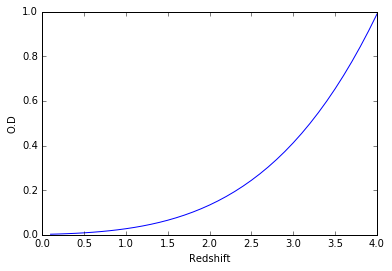

In [2]:
'''Optical Depth vs z'''
z = np.arange(0.1,4.1,0.1)
y = ((0.0018) * (1 + z)**3.92)
wavelength = (1216*(z+1))
plt.xlabel('Redshift')
plt.ylabel('O.D')

plt.plot(z,y)
plt.show()

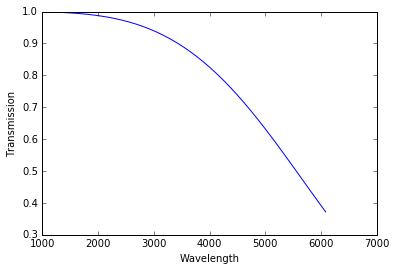

In [3]:
'''Transmission vs Wavelength'''

rsrange = np.arange(0.1,4.1,0.1)
tau = ((0.0018) * (1 + rsrange)**3.92)
wavelength = (1216*(rsrange+1))
plt.plot(wavelength,np.exp(-tau))
plt.xlabel('Wavelength')
plt.ylabel('Transmission')


plt.show()

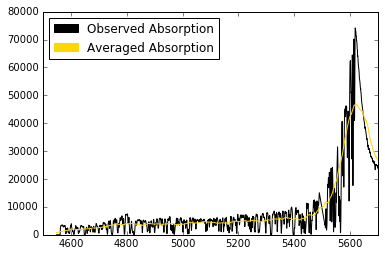

In [4]:
'''peaks correspond to low dense, dips correspond to light being stretched to 1216, 1216 is ly-alpha line;
anything before it is the ly-alpha forest; The red line represents the smoothing of hydrogen clouds'''

def movingaverage(interval, window_size):
    window= np.ones(float(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')
import matplotlib.patches as mpatches

a_img_av = movingaverage(a_img, 200)

black_patch = mpatches.Patch(color='black', label='Observed Absorption')
gold_patch = mpatches.Patch(color='gold', label='Averaged Absorption')

plt.plot(wl,a_img, "black")
plt.plot(wl, a_img_av,"gold")
plt.xlim(4500,5700)
plt.ylim(0,80000)
plt.legend(handles=[black_patch,gold_patch], loc='best')
plt.savefig('avgandob')
plt.show()



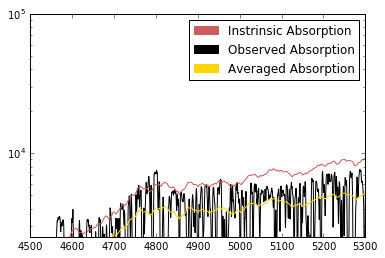

In [5]:
'''Used Faucher-Giguere's correction to find the intrinsic spectrum of the quasar'''

import matplotlib.patches as mpatches
black_patch = mpatches.Patch(color='black', label='Observed Absorption')
gold_patch = mpatches.Patch(color='gold', label='Averaged Absorption')
indianred_patch = mpatches.Patch(color='indianred', label='Instrinsic Absorption')

z = ((wl/1216)-1)
opacity = ((0.0018) * (1 + z)**3.92)
transm = np.exp(-opacity)
intr = a_img_av/transm

plt.plot(wl, a_img, "black")
plt.plot(wl,a_img_av,"gold")
plt.plot(wl,intr,"indianred")

plt.xlim(4500,5300)
plt.ylim(10**3.4,10**5)
plt.yscale('log')
plt.legend(handles=[indianred_patch,black_patch,gold_patch], loc='best')
plt.savefig('ioa')

plt.show()



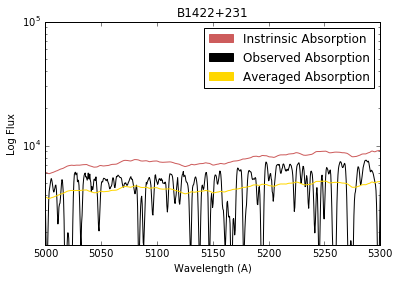

In [6]:
'''5000-5300 range is right before the quasar. this is a relatively low dense region of hydrogen;
peaks correspond to low dense, dips correspond to light being stretched to 1216 '''
black_patch = mpatches.Patch(color='black', label='Observed Absorption')
gold_patch = mpatches.Patch(color='gold', label='Averaged Absorption')
indianred_patch = mpatches.Patch(color='indianred', label='Instrinsic Absorption')

z = ((col1/1216)-1)
opacity = ((0.0018) * (1 + z)**3.92)
transm = np.exp(-opacity)
intr = a_img_av/transm

plt.plot(wl, a_img, "black")
plt.plot(wl,a_img_av,"gold")
plt.plot(wl,intr,"indianred")
plt.xlim(5000,5300)
plt.ylim(10**3.2,10**5)
plt.yscale('log')
plt.ylabel('Log Flux')
plt.xlabel('Wavelength (A)')
plt.title('B1422+231')


plt.legend(handles=[indianred_patch, black_patch, gold_patch], loc='best')
plt.savefig('i and a')

plt.show()

<function matplotlib.pyplot.show>

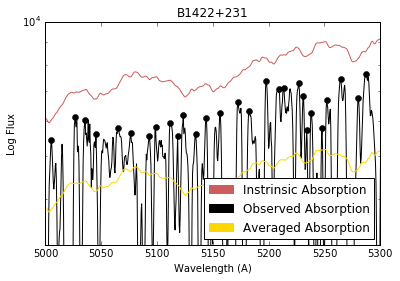

In [7]:
'''the black dots represent the maximum points from 5000-5300 '''
'''used the old variables'''

import sys
from numpy import NaN, Inf, arange, isscalar, asarray, array

def peakdet(v, delta, x = None):
    maxtab = []
    mintab = []
       
    if x is None:
        x = arange(len(v))
    
    v = asarray(v)
    
    if len(v) != len(x):
        sys.exit('Input vectors v and x must have same length')
    
    if not isscalar(delta):
        sys.exit('Input argument delta must be a scalar')
    
    if delta <= 0:
        sys.exit('Input argument delta must be positive')
    
    mn, mx = Inf, -Inf
    mnpos, mxpos = NaN, NaN
    
    lookformax = True
    
    for i in arange(len(v)):
        this = v[i]
        if this > mx:
            mx = this
            mxpos = x[i]
        if this < mn:
            mn = this
            mnpos = x[i]
        
        if lookformax:
            if this < mx-delta:
                maxtab.append((mxpos, mx))
                mn = this
                mnpos = x[i]
                lookformax = False
        else:
            if this > mn+delta:
                mintab.append((mnpos, mn))
                mx = this
                mxpos = x[i]
                lookformax = True

    return array(maxtab), array(mintab)

#"threshold of the yaxis, list of ind where that condition is true 
ind = np.where(col2>=4000)
#making copy of col1 for only for those values
newwl = col1[ind]
#from really long peakdet func
ymax,ymin = peakdet(col2[ind],1000)
#coverting the x ind to integers bc theyre floats
xmax = [int(s) for s in ymax[:,0]]


plt.legend(handles=[indianred_patch, black_patch, gold_patch], loc='best')
plt.savefig('i and a')


plt.plot(wl, a_img, "black")
plt.plot(wl,a_img_av,"gold")
plt.plot(wl,intr,"indianred")
#gave errors before to list convert astropy table to list so it doesnt give errors and made xmax a variable, a
a=newwl[xmax].tolist()
plt.plot(a,ymax,"ko")

plt.ylim(10**3.5,10**4)
plt.yscale('log')
plt.xlim(5000,5300)
plt.yscale('log')
plt.ylabel('Log Flux')
plt.xlabel('Wavelength (A)')
plt.title('B1422+231')

plt.legend(handles=[indianred_patch, black_patch, gold_patch], loc='best')
plt.savefig('peaks')
plt.show


In [8]:
#"threshold of the yaxis, list of ind where that condition is true 
ind = np.where(col2>=4000)
#making copy of col1 for only for those values
newcol1 = col1[ind]
#from really long peakdet func
ymax,ymin = peakdet(col2[ind],1000)
#coverting the x ind to integers bc theyre floats
xmax = [int(s) for s in ymax[:,0]]


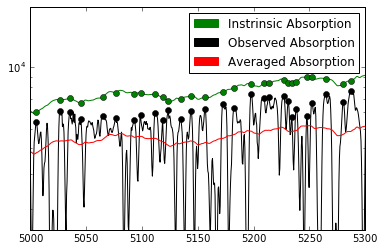

In [9]:
'''green dots are the same xs of the black dots'''

newwlg=intr[ind]
newintr=newwlg[xmax]

plt.plot(wl, a_img, "black")
plt.plot(wl,a_img_av,"red")
plt.plot(wl,intr,"green")
#gave errors before to list convert astropy table to list so it doesnt give errors
a=newwl[xmax].tolist()
plt.plot(a,ymax,"ko")
plt.plot(a,newintr,"go")

plt.ylim(10**3.2,10**4.3)
plt.yscale('log')
plt.xlim(5000,5300)
green_patch = mpatches.Patch(color='green', label='Instrinsic Absorption')
red_patch = mpatches.Patch(color='red', label='Averaged Absorption')

plt.legend(handles=[green_patch, black_patch, red_patch], loc='best')


plt.savefig('new.png')


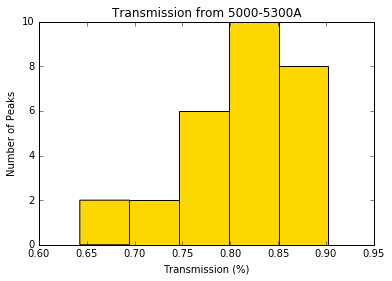

In [10]:
'''have the transmission values for the region, had to make an index for variable a '''
t= ymax[:,1]/newintr
a = np.array(a)
ind2, = np.where((a >= 5000) & (a <= 5300))

'''histogram of transmission in 5000-5300; mostly 10-25% of light gets absorbed in this relativly low regions of 
hydrogenor 75-90% transparent; '''
plt.hist(t[ind2],bins=5,color='gold')
plt.title('Transmission from 5000-5300A')
plt.ylabel('Number of Peaks')
plt.xlabel('Transmission (%)')

plt.savefig('histogram trans')

plt.show()

In [11]:
#Creating an index
'''turning the data into arrays. creating an index for to normalize both image a and b'''
wl = np.asarray(data['col1'])
a_img = np.asarray(data['col2'])
b_img = np.asarray(data['col3'])
c_img = np.asarray(data['col4'])
d_img = np.asarray(data['col5'])
nfind = np.where((wl <= 5200) & (wl >= 5000))

(-4000, 10000)

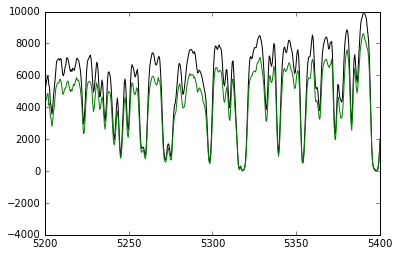

In [12]:
#Graph of image a and b in the 5000-5200; this is where I want to normalize because its in the contim. 
plt.plot(wl,a_img,'black')
plt.plot(wl,b_img,'green')
plt.xlim(5200,5400)
plt.ylim(-4000,10000)

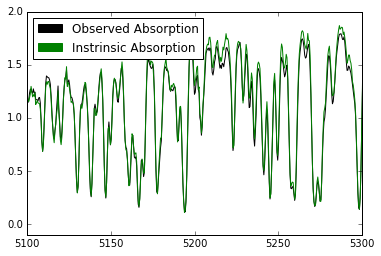

In [87]:
#Normalizing Flux
'''Pick a region to where you want to normalize. Find the avg of the flux in this wavelength range'''
'''divide the flux over the avg of the flux in this wavelength range'''
normalized_flux_ind = np.where((wl <= 5200) & (wl >= 5000))

a_img_nf_avg = a_img[normalized_flux_ind].mean()
a_img_nf = a_img/a_img_nf_avg
b_img_nf_avg = b_img[normalized_flux_ind].mean()
b_img_nf = b_img/b_img_nf_avg

plt.plot(wl,a_img_nf, 'black')
plt.plot(wl,b_img_nf, 'green')
plt.xlim(5100,5300)
plt.ylim(-.1,2)

plt.legend(handles=[black_patch, green_patch], loc='best')
plt.savefig('NFvsWL.png')


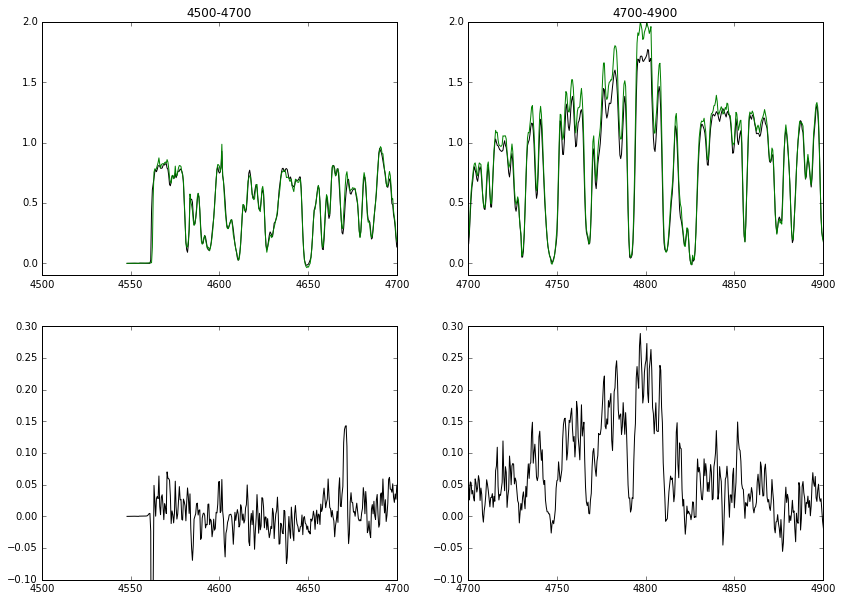

In [90]:
#This gives us the plots for 4500-4900
#Black is image a; Blue is image B
#Bottom graphs are residuals 

residuals_ab = b_img_nf-a_img_nf


plt.subplot("221")
plt.plot(wl,a_img_nf, 'black')
plt.plot(wl,b_img_nf, 'green')
plt.xlim(4500,4700)
plt.ylim(-.1,2)
plt.title('4500-4700')

plt.subplot("223")
plt.plot(wl, residuals_ab, 'black')
plt.xlim(4500,4700)
plt.ylim(-.1,.3)


plt.subplot("222")
plt.plot(wl,a_img_nf, 'black')
plt.plot(wl,b_img_nf, 'green')
plt.xlim(4700,4900)
plt.ylim(-.1,2)
plt.title('4700-4900')


plt.subplot("224")
plt.plot(wl, residuals_ab, 'black')
plt.xlim(4700,4900)
plt.ylim(-.1,.3)

fig = plt.gcf()
fig.set_size_inches(14,10, forward = True)
plt.savefig('4500-4900.png')

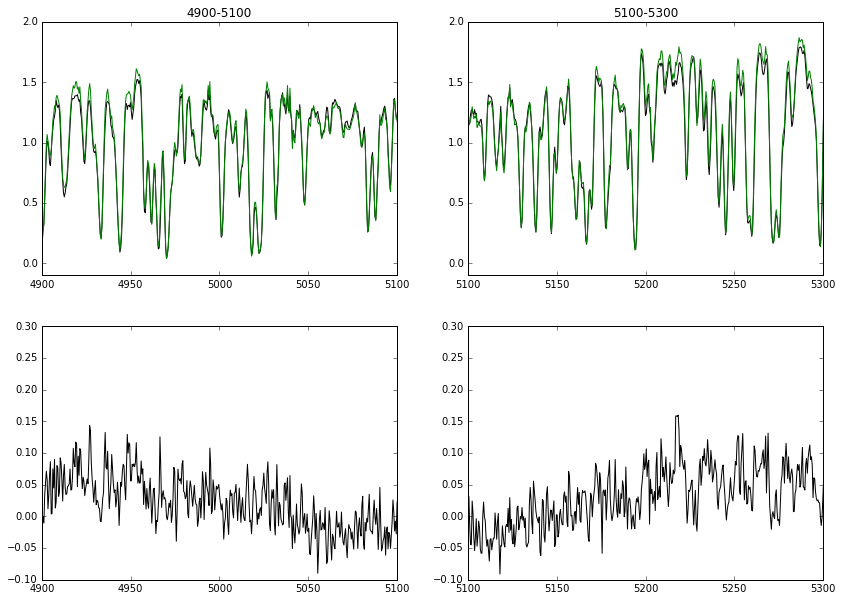

In [91]:

plt.subplot("221")
plt.plot(wl,a_img_nf, 'black')
plt.plot(wl,b_img_nf, 'green')
plt.xlim(4900,5100)
plt.ylim(-.1,2)
plt.title('4900-5100')

plt.subplot("223")
plt.plot(wl, residuals_ab, 'black')
plt.xlim(4900,5100)
plt.ylim(-.1,.3)

plt.subplot("222")
plt.plot(wl,a_img_nf, 'black')
plt.plot(wl,b_img_nf, 'green')
plt.xlim(5100,5300)
plt.ylim(-.1,2)
plt.title('5100-5300')


plt.subplot("224")
plt.plot(wl, residuals_ab, 'black')
plt.xlim(5100,5300)
plt.ylim(-.1,.3)

fig = plt.gcf()
fig.set_size_inches(14,10, forward = True)
plt.savefig('4900-5100.png')

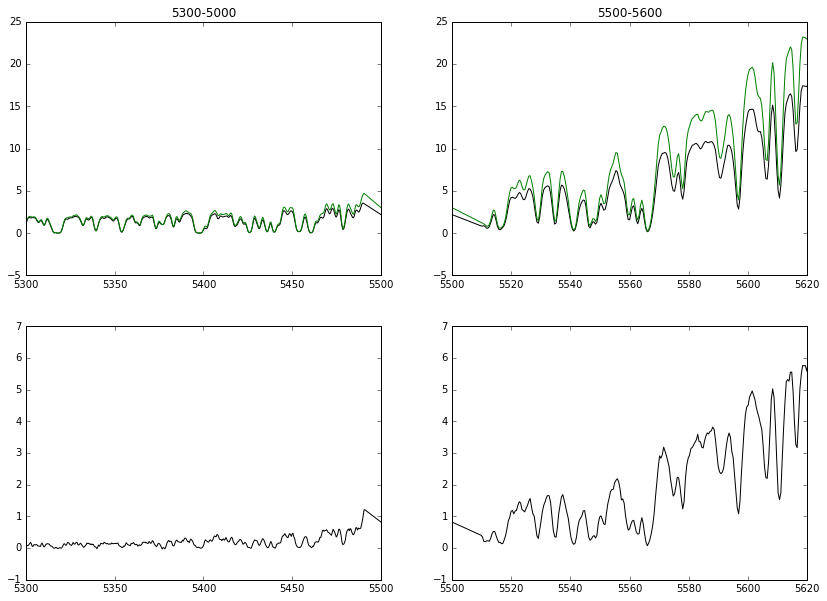

In [92]:
plt.subplot("221")
plt.plot(wl,a_img_nf, 'black')
plt.plot(wl,b_img_nf, 'green')
plt.xlim(5300,5500)
plt.title('5300-5000')

plt.subplot("223")
plt.plot(wl, residuals_ab, 'black')
plt.xlim(5300,5500)

plt.subplot("222")
plt.plot(wl,a_img_nf, 'black')
plt.plot(wl,b_img_nf, 'green')
plt.xlim(5500,5620)
plt.title('5500-5600')


plt.subplot("224")
plt.plot(wl, residuals_ab, 'black')
plt.xlim(5500,5620)

fig = plt.gcf()
fig.set_size_inches(14,10, forward = True)
plt.savefig('5300-5600.png')

In [49]:
from astropy import cosmology
from astropy.cosmology import WMAP9
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
print(WMAP9.__doc__)

In [77]:
FL=FlatLambdaCDM(H0=69.3, Om0=.286)
FL.angular_diameter_distance(.338)

<Quantity 1009.3816426131501 Mpc>

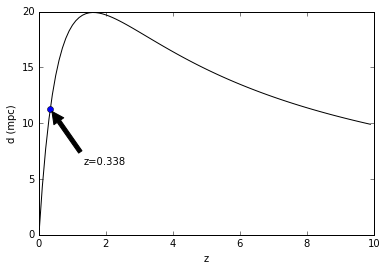

In [86]:
redshifts = np.arange(0,10,0.1)
ang_diam = WMAP9.angular_diameter_distance(redshifts)
zlens=0.338
anglens=WMAP9.angular_diameter_distance(zlens)
theta = 0.64 * u.degree
theta = theta.to('rad')
d = theta * ang_diam
dlens= theta * anglens
plt.plot (redshifts,d, 'black', zlens, dlens, 'o')
plt.xlabel('z')
plt.ylabel('d (mpc)')
plt.annotate(s='z=0.338', xy=(zlens, dlens.value), xytext=(zlens+1, dlens.value-5), arrowprops=dict(facecolor='black', shrink=0.05))

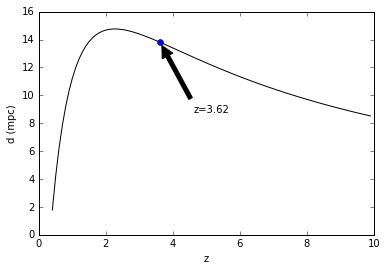

In [84]:
zlens=0.338
zimg=3.62

zs=redshifts[redshifts>zlens]
ang=WMAP9.angular_diameter_distance_z1z2(z1=zlens, z2=zs)
angimg=WMAP9.angular_diameter_distance_z1z2(z1=zlens, z2=zimg)
theta = 0.64 * u.degree
theta = theta.to('rad')
d = theta * ang
dimg= theta * angimg
plt.plot (zs,d, 'black', zimg, dimg, 'o')
plt.xlabel('z')
plt.ylabel('d (mpc)')
plt.annotate(s='z='+str(zimg), xy=(zimg, dimg.value), xytext=(zimg+1, dimg.value-5), arrowprops=dict(facecolor='black', shrink=0.05))

In [ ]:
|